In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Global YouTube Statistics.csv', encoding='ISO-8859-1')

# Select relevant features
features = ['uploads', 'video views', 'Country']
data = data.dropna(subset=['subscribers'])  # Drop rows where subscribers are missing

# Convert categorical features (Country) into numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features])

# Define target variable
target = data['subscribers']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 73362861817048.5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


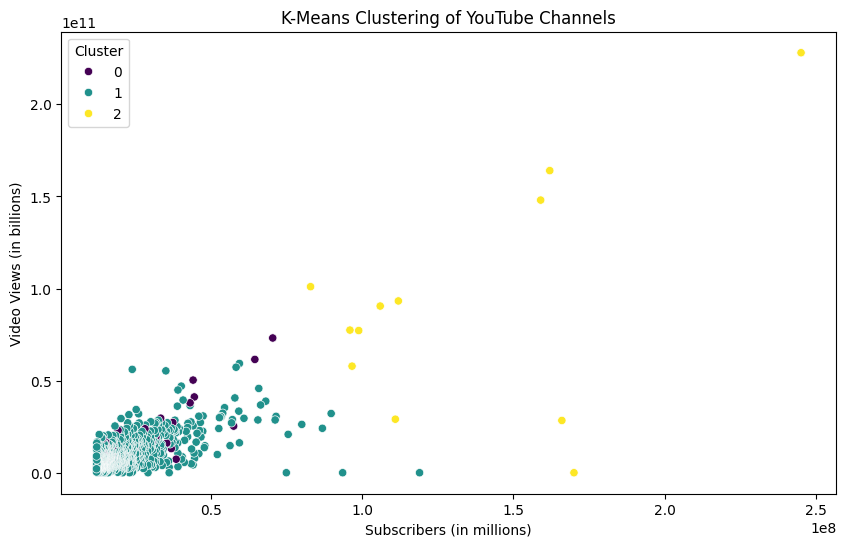

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Use numerical features for clustering
clustering_data = data[['subscribers', 'uploads', 'video views']].dropna()

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Fit the KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video views', hue='Cluster', palette='viridis', data=data)
plt.xlabel('Subscribers (in millions)')
plt.ylabel('Video Views (in billions)')
plt.title('K-Means Clustering of YouTube Channels')
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select relevant features for classification
classification_features = ['uploads', 'video views', 'subscribers']

# Drop rows with missing target or feature values
data = data.dropna(subset=['category'] + classification_features)

# Encode the target variable (category) into numerical values
data['category_encoded'] = data['category'].astype('category').cat.codes

# Prepare the feature matrix and target vector
X = data[classification_features]
y = data['category_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.36      0.31      0.33        13
           2       0.00      0.00      0.00         8
           3       0.27      0.44      0.33        48
           4       0.00      0.00      0.00        10
           5       0.21      0.25      0.23        20
           6       0.00      0.00      0.00        11
           8       0.41      0.59      0.48        34
           9       0.00      0.00      0.00         7
          11       0.20      0.12      0.15        24
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1

    accuracy                           0.28       190
   macro avg       0.11      0.13      0.12       190
weighted avg       0.21      0.28      0.24       190



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


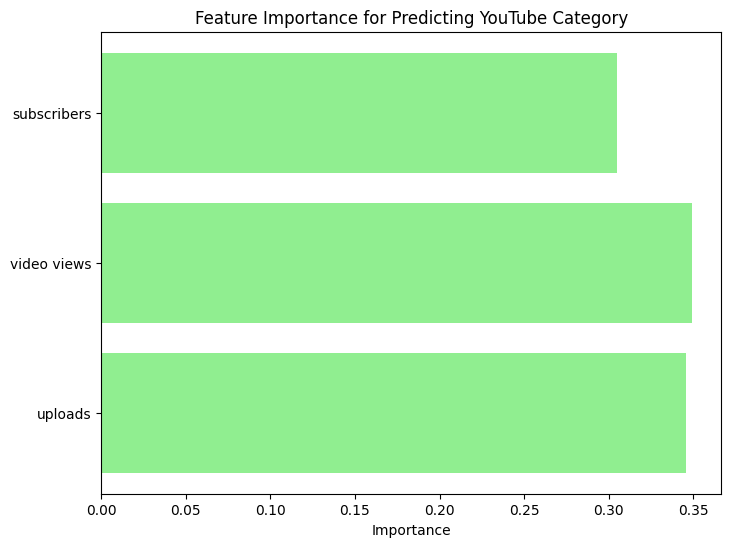

In [28]:
# Calculate feature importance
importances = rf_model.feature_importances_
feature_names = classification_features

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting YouTube Category')
plt.show()


In [29]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.3359683794466403
